In [1]:
import numpy as np 
import pygimli as pg 
from pygimli.physics import ert 
import pygimli.meshtools as mt
import pandas as pd
import seaborn as sns

In [92]:
data = ert.load("datos_ip/Datos_reales_3.dat")

In [93]:
print(data)

Data: Sensors: 64 data: 4067, nonzero entries: ['a', 'b', 'ip', 'm', 'n', 'r', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22a27c5fa60>)

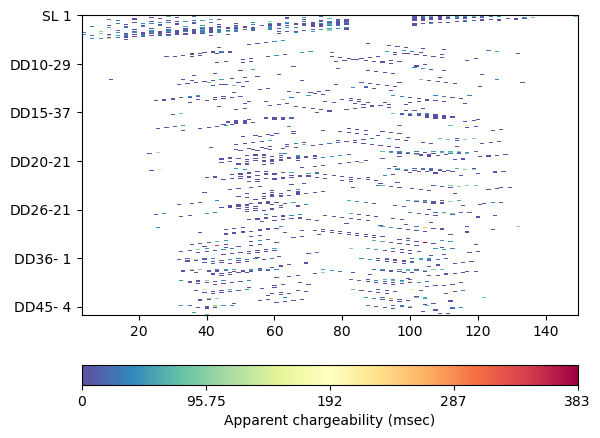

In [94]:
data.show("ip", label="Apparent chargeability (msec)")

In [95]:
data["k"] = ert.geometricFactors(data)

In [96]:
data["k"]

4067 [-33416.06562779506,...,6541.203845052005]

In [97]:
data["rhoa"] = data("r")*data("k")

In [98]:
data["rhoa"]

4067 [731.8118372487119,...,693.3676075755125]

In [99]:
data.estimateError()

In [100]:
data["err"]

4067 [0.030001366471474087,...,0.030001442236396787]

In [101]:
data_unmodified = data

In [13]:
mgr = ert.ERTIPManager(data)

In [14]:
inv1 = mgr.invert(verbose=True)

12/02/24 - 19:50:00 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 19:50:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 19:50:00 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 19:50:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 19:50:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 19:50:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 19:50:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
12/02/24 - 19:50:00 - pyGIMLi - INFO - Use median(data values)=114.5778443471115
12/02/24 - 19:50:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=114.577844/114.577844
12/02/24 - 19:50:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000229CFCED950>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229CFCEDEF0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000229CFCED5E0>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1192.54 (dPhi = 27.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  980.12 (dPhi = 17.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  878.28 (dPhi = 10.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  791.48 (dPhi = 9.76%) lam: 20.0
-------------

12/02/24 - 19:51:54 - pyGIMLi - INFO - Found 1 regions.
12/02/24 - 19:51:54 - pyGIMLi - INFO - Starting inversion.


chi² =  660.36 (dPhi = 1.60%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.6 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x00000229CFCEDD60>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000229CFC3F280>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229CFCED9A0>
min/max (data): 0/0.38
min/max (error): 3.26%/inf%
min/max (start model): 0/0
--------------------------------------------------------------------------------


RuntimeError: ./core/src/inversion.cpp:115		double GIMLI::RInversion::getPhiM(const Vec&) const  getPhiM == nan

## Control de calidad (QC)

<Axes: ylabel='Count'>

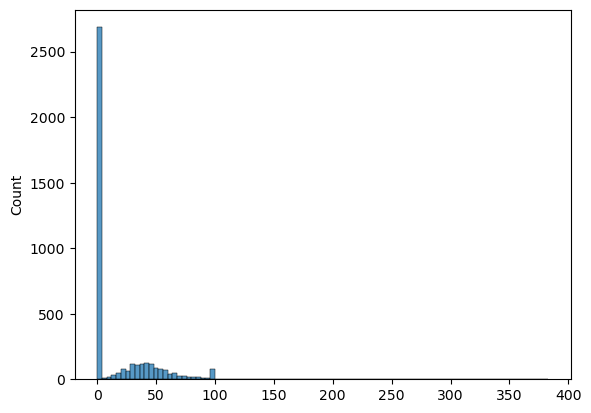

In [15]:
sns.histplot(data["ip"])

In [16]:
data_array_ip = np.array(data["ip"])

In [17]:
data_series_ip = pd.Series(data_array_ip)

In [18]:
quantile_99_ip = data_series_ip.quantile(0.99)
quantile_1_ip = data_series_ip.quantile(0.01)

In [19]:
quantile_1_ip, quantile_99_ip

(0.0, 99.0)

In [21]:
median_ip = data_series_ip.median()
median_ip

0.0

In [63]:
quantile_659_ip = data_series_ip.quantile(0.659)
quantile_659_ip

1.3098800000000028

In [22]:
quantile_75_ip = data_series_ip.quantile(0.75)
quantile_75_ip

31.85

# Alternativa número 1

Aproximar IP aparente = 0 a un valor cercano a cero

In [58]:
for ip in range(len(data["ip"])):
    if data["ip"][ip] <= 0:
        data["ip"][ip] = 0.00001

In [53]:
type(data["ip"])

pgcore._pygimli_.RVector

In [59]:
data["ip"]

4067 [1e-05,...,44.1]

In [60]:
mgr1 = ert.ERTIPManager(data)

In [61]:
inv1 = mgr1.invert(verbose=True)

12/02/24 - 20:13:21 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:13:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:13:21 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:13:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:13:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 20:13:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 20:13:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
12/02/24 - 20:13:21 - pyGIMLi - INFO - Use median(data values)=114.5778443471115
12/02/24 - 20:13:21 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=114.577844/114.577844
12/02/24 - 20:13:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000229E51629A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229E5162F40>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000229E5162540>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1192.56 (dPhi = 27.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  980.14 (dPhi = 17.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  878.26 (dPhi = 10.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  791.41 (dPhi = 9.77%) lam: 20.0
-------------

12/02/24 - 20:15:30 - pyGIMLi - INFO - Found 1 regions.
12/02/24 - 20:15:30 - pyGIMLi - INFO - Starting inversion.


chi² =  660.34 (dPhi = 1.60%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.6 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x00000229E51622C0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000229E5159040>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229E5162590>
min/max (data): 1.0e-08/0.38
min/max (error): 3.26%/1.0e+07%
min/max (start model): 1.0e-08/1.0e-08
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  122.51
--------------------------------------------------------------------------------
inv.iter 1 ... !!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0


12/02/24 - 20:15:34 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


chi² =  122.51 (dPhi = 0.00%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

12/02/24 - 20:15:36 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

12/02/24 - 20:15:38 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

12/02/24 - 20:15:40 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################


Le subiremos un orden de magnitud a los valores que habíamos convertido antes\
Usaremos el cuantil 659 como referencia

In [64]:
data["ip"] = [0.0001 if ip <= quantile_659_ip else ip for ip in data["ip"]] # Método List Comprehension

In [66]:
mgr2 = ert.ERTIPManager(data)

In [67]:
inv2 = mgr2.invert(verbose=True)

12/02/24 - 20:19:08 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:19:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:19:08 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:19:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:19:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 20:19:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 20:19:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
12/02/24 - 20:19:08 - pyGIMLi - INFO - Use median(data values)=114.5778443471115
12/02/24 - 20:19:08 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=114.577844/114.577844
12/02/24 - 20:19:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000229F237BB30>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229F237B770>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000229F237B540>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1192.55 (dPhi = 27.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  980.13 (dPhi = 17.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  878.23 (dPhi = 10.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  791.49 (dPhi = 9.75%) lam: 20.0
-------------

12/02/24 - 20:21:15 - pyGIMLi - INFO - Found 1 regions.
12/02/24 - 20:21:15 - pyGIMLi - INFO - Starting inversion.


chi² =  660.30 (dPhi = 1.60%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.6 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x00000229F2378E50>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000229F237E880>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229F237B5E0>
min/max (data): 1.0e-07/0.38
min/max (error): 3.26%/1.0e+06%
min/max (start model): 1.0e-07/1.0e-07
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  122.51
--------------------------------------------------------------------------------
inv.iter 1 ... 

12/02/24 - 20:21:18 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

12/02/24 - 20:21:20 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

12/02/24 - 20:21:23 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

12/02/24 - 20:21:25 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(d:\Anaconda\envs\pg\lib\site-packages\pygimli\frameworks\inversion.py:682)
One step failed. Aborting and going back to last model


!!! Critical !!!:  response for model with negative or zero resistivity is not defined.: 0 0
chi² =  122.51 (dPhi = 0.00%) lam: 100.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################


In [72]:
data["ip"] = np.where(data["ip"] <= quantile_659_ip, 0.1, data["ip"]) # Método con numpy.where()

In [73]:
data["ip"]

4067 [0.1,...,44.1]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x229e53c97c0>)

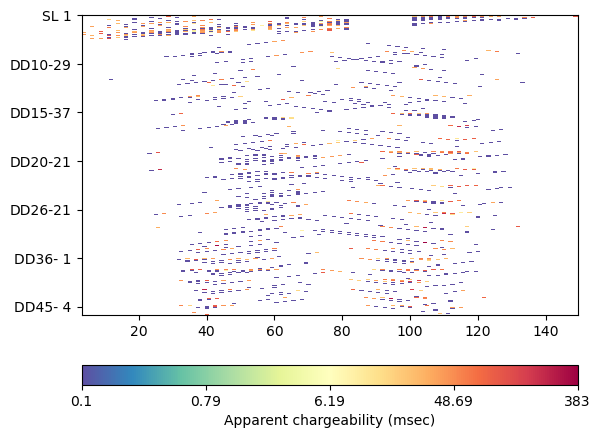

In [74]:
data.show("ip", label="Apparent chargeability (msec)")

In [75]:
mgr3 = ert.ERTIPManager(data)

In [76]:
inv3 = mgr3.invert(verbose=True)

12/02/24 - 20:33:08 - pyGIMLi - INFO - Found 2 regions.


12/02/24 - 20:33:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:33:08 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:33:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:33:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 20:33:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 20:33:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
12/02/24 - 20:33:08 - pyGIMLi - INFO - Use median(data values)=114.5778443471115
12/02/24 - 20:33:08 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=114.577844/114.577844
12/02/24 - 20:33:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000229F2693A90>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229F2693C20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000229F2693B80>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1192.55 (dPhi = 27.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  980.16 (dPhi = 17.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  878.26 (dPhi = 10.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  791.45 (dPhi = 9.76%) lam: 20.0
-------------

12/02/24 - 20:35:21 - pyGIMLi - INFO - Found 1 regions.
12/02/24 - 20:35:21 - pyGIMLi - INFO - Starting inversion.


chi² =  660.30 (dPhi = 1.60%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.6 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x00000229F237F540>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000229F2689CA0>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229F2693860>
min/max (data): 1.0e-04/0.38
min/max (error): 3.26%/1003%
min/max (start model): 1.0e-04/1.0e-04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  121.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  121.21 (dPhi = 0.64%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  115.05 (dPhi = 5.07%) lam: 

(1440.0, 1490.006104)

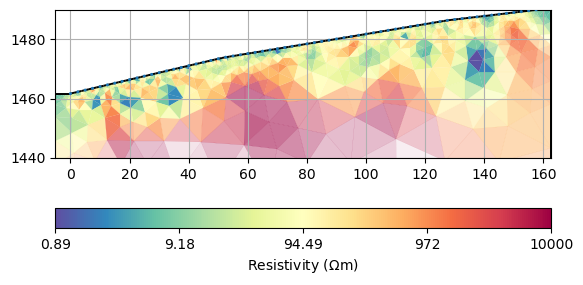

In [87]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr3.showResult(**kw)
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

(1440.0, 1490.006104)

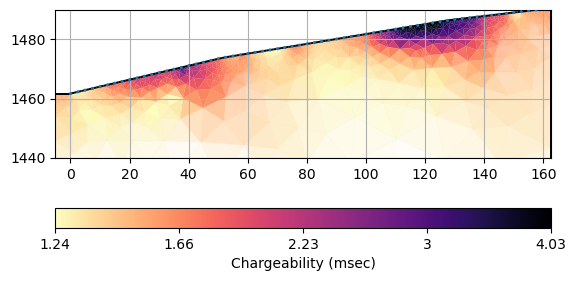

In [121]:
ax, cb = mgr3.showIPModel(ipkw={},label="Chargeability (msec)")
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

Eliminaremos los datos menores que el cuantil 659

In [80]:
data.remove(data["ip"] < quantile_659_ip)

In [81]:
print(data)

Data: Sensors: 64 data: 1387, nonzero entries: ['a', 'b', 'err', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22a1e117070>)

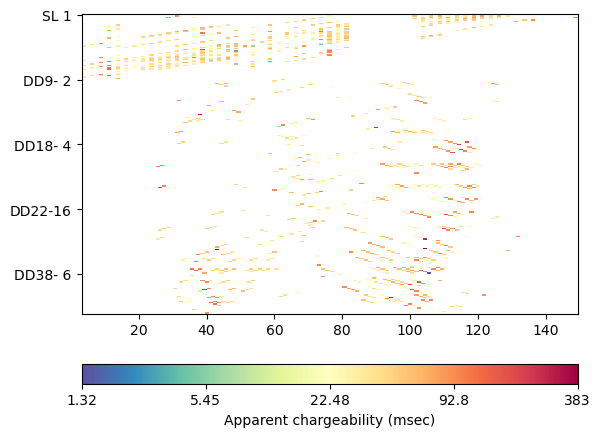

In [82]:
data.show("ip", label="Apparent chargeability (msec)")

In [83]:
mgr4 = ert.ERTIPManager(data)

In [84]:
inv4 = mgr4.invert(verbose=True)

12/02/24 - 20:47:14 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:47:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:47:14 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:47:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:47:14 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 20:47:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 20:47:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
12/02/24 - 20:47:15 - pyGIMLi - INFO - Use median(data values)=84.5838088403623
12/02/24 - 20:47:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=84.583809/84.583809
12/02/24 - 20:47:15 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022A1CF3C270>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022A1CD924F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000022A1CF3CAE0>
min/max (data): 11.3/1.9e+04
min/max (error): 3%/3.01%
min/max (start model): 84.58/84.58
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1454.66
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  632.88 (dPhi = 56.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  435.80 (dPhi = 30.23%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  273.17 (dPhi = 35.06%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  258.92 (dPhi = 5.51%) lam: 20.0
---------

12/02/24 - 20:47:56 - pyGIMLi - INFO - Found 1 regions.
12/02/24 - 20:47:56 - pyGIMLi - INFO - Starting inversion.


chi² =  249.28 (dPhi = 1.20%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.2 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x0000022A1CF551D0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000022A1E0A6B20>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022A1CF3C8B0>
min/max (data): 0.0013/0.38
min/max (error): 3.26%/78.76%
min/max (start model): 0.04/0.04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   94.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   74.85 (dPhi = 18.22%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   68.58 (dPhi = 7.55%) lam: 100.0

(1440.0, 1490.006104)

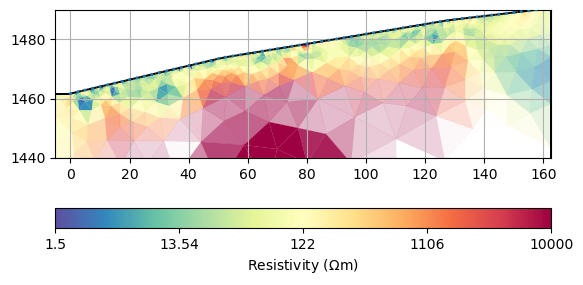

In [89]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr4.showResult(**kw)
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

(1440.0, 1490.006104)

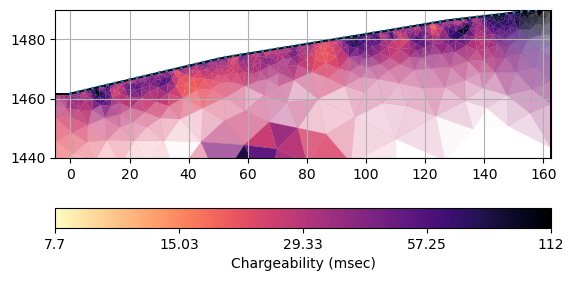

In [120]:
ax, cb = mgr4.showIPModel(ipkw={}, label="Chargeability (msec)")
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x229f28ec700>)

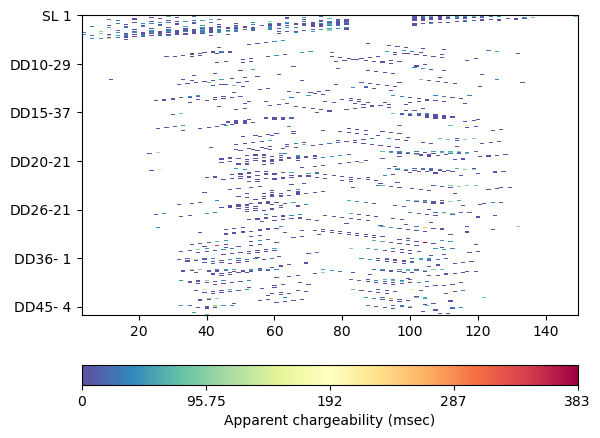

In [102]:
data.show("ip", label="Apparent chargeability (msec)")

In [104]:
data["ip"] = [quantile_659_ip if ip < quantile_659_ip else ip for ip in data["ip"]] 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x229f2c2da00>)

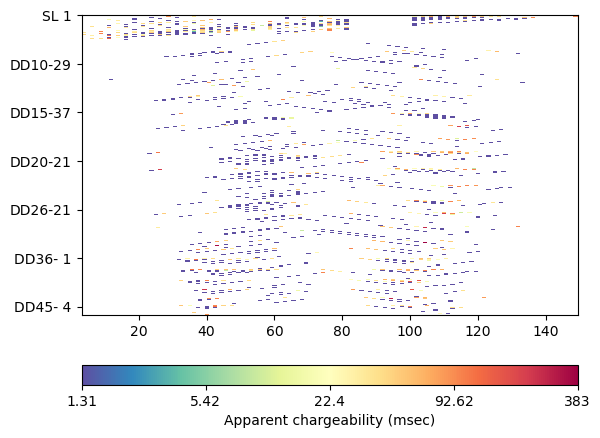

In [105]:
data.show("ip", label="Apparent chargeability (msec)")

In [107]:
mgr5 = ert.ERTIPManager(data)
inv5 = mgr5.invert(verbose=True)

12/02/24 - 20:59:13 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:59:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:59:13 - pyGIMLi - INFO - Found 2 regions.
12/02/24 - 20:59:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
12/02/24 - 20:59:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/02/24 - 20:59:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/02/24 - 20:59:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
12/02/24 - 20:59:13 - pyGIMLi - INFO - Use median(data values)=114.5778443471115
12/02/24 - 20:59:13 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=114.577844/114.577844
12/02/24 - 20:59:13 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022A1CD8BAE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022A1CD8BF90>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000022A1CD8BD10>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.92
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1192.55 (dPhi = 27.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  980.15 (dPhi = 17.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  878.26 (dPhi = 10.31%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  791.48 (dPhi = 9.76%) lam: 20.0
-------------

12/02/24 - 21:01:18 - pyGIMLi - INFO - Found 1 regions.
12/02/24 - 21:01:18 - pyGIMLi - INFO - Starting inversion.


chi² =  671.41 (dPhi = 3.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =  660.30 (dPhi = 1.60%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.6 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x0000022A1CD8B1D0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000229F2CCC340>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000229F6746810>
min/max (data): 0.0013/0.38
min/max (error): 3.26%/79.34%
min/max (start model): 0.0013/0.0013
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  115.76
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  109.40 (dPhi = 5.42%) lam: 100

(1440.0, 1490.006104)

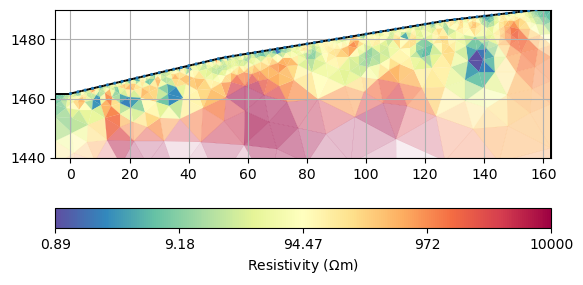

In [108]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr5.showResult(**kw)
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

(1440.0, 1490.006104)

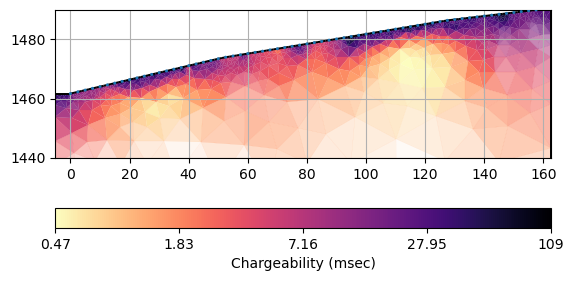

In [119]:
ax, cb = mgr5.showIPModel(ipkw={'cMax' : 27.95}, label="Chargeability (msec)")
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

array([<Axes: xlabel='x (m)', ylabel='z (m)'>,
       <Axes: xlabel='x (m)', ylabel='z (m)'>], dtype=object)

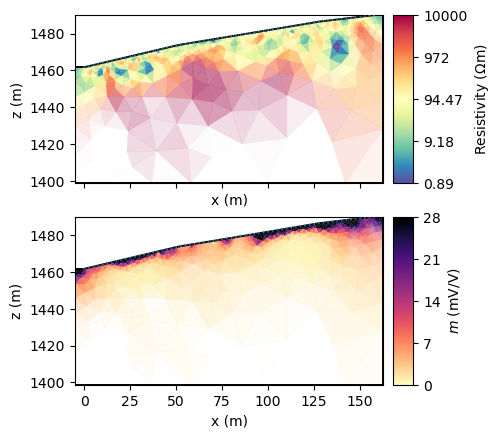

In [118]:
mgr5.showResults(reskw={'cMax':10000}, ipkw={'cMax': 28})